## Case Study: Classification
Zsanett Borsos
Part-time data analyst bootcamp
Berlin Nov 2021 - May 2022

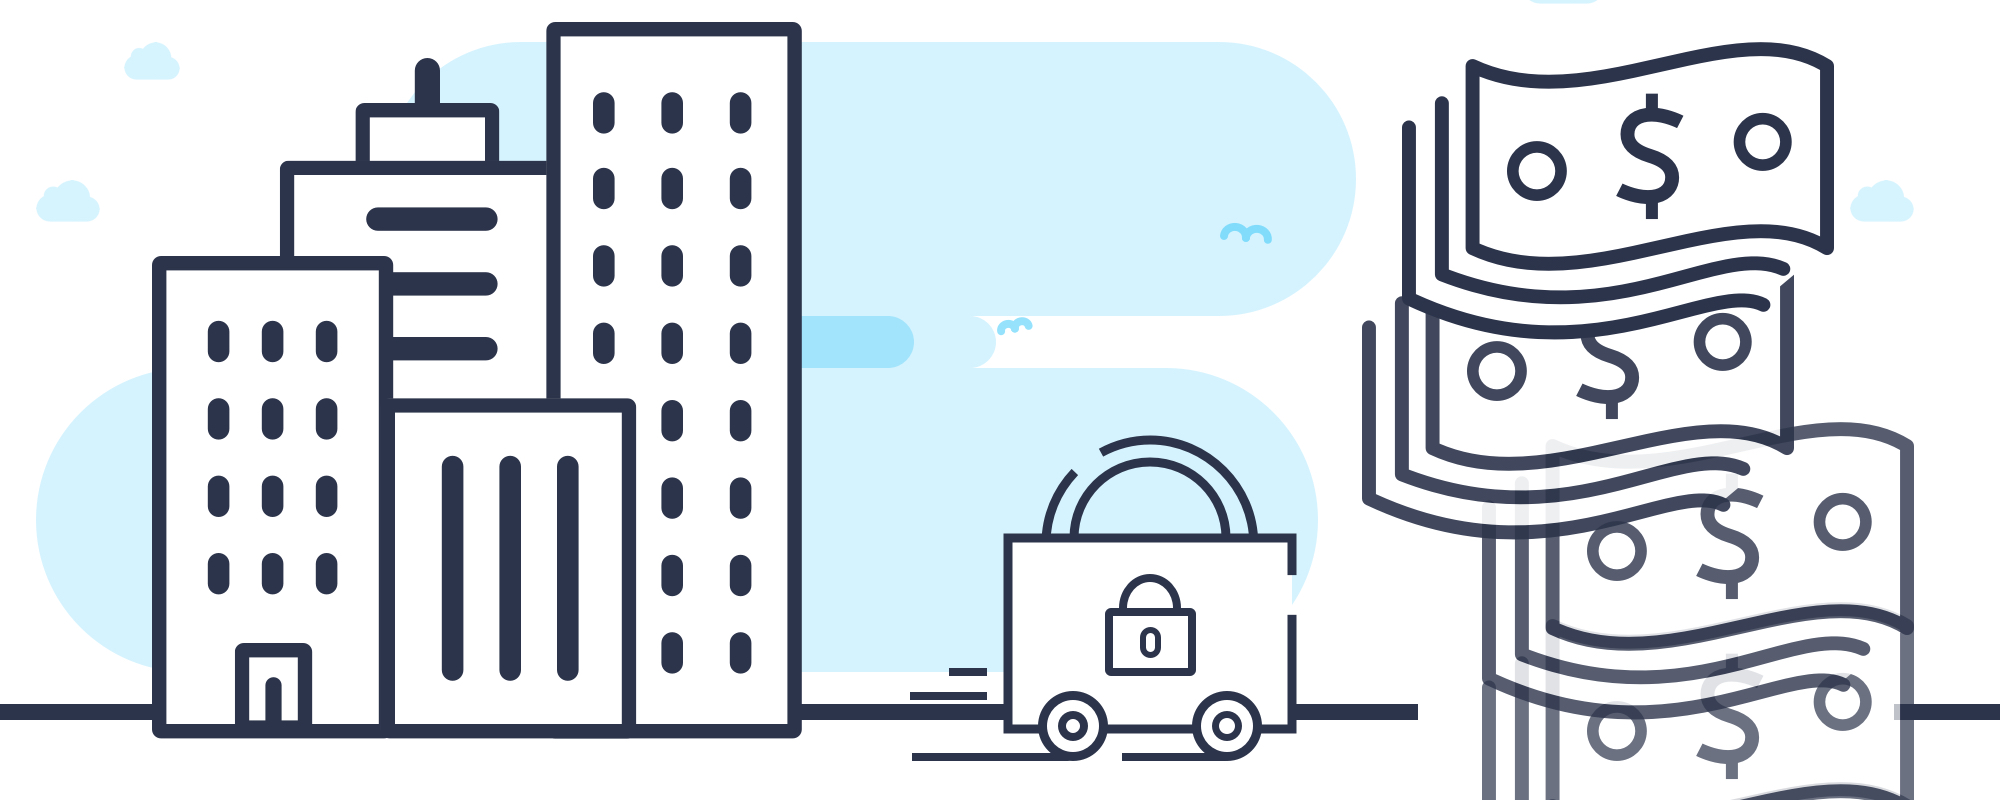

### Scenario
You are working as a risk analyst with a bank. Apart from the other banking and loan services, the bank also provides credit card services that are a very important source of revenue for the bank. The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.

Usually, the observational data for these kinds of problems is somewhat limited in that often the company sees only those who respond to an offer. To get around this, the bank designs a focused marketing study, with 18,000 current bank customers. This focused approach allows the bank to know who does and does not respond to the offer, and to use existing demographic data that is already available on each customer.

### Objective
Build a model that will provide insight into why some bank customers accept credit card offers. There are also other potential areas of opportunities that the bank wants to understand from the data.

Your senior management has also posted these other questions that will help them better understand their customers.

### <a id="TOP"></a>Table of contents

#### 1. [Exploring the data](#Exploring-the-data)
#### 2. [Build a Model](#Building-a-model)
- [Logistic Regression 1: Default / baseline](#LR1)
- [Logistic Regression 2: Oversampling: Weighted data](#LR2)
- [Logistic Regression 3: Oversampling: Synthetic Minority Oversampling Technique (SMOTE)](#LR3)
- [Logistic Regression 4: Undersampling](#LR4)
- [Logistic Regression: Conclusion](#LRconc)
#### 3. Visualize


#### Importing all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.datasets import make_classification
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### <a id="Exploring-the-data"></a>1. Exploring the data

Upon reviewing the questions and materials, I came to the conclusion that this is a case of binary classification, as there are only two possible outcomes: 1. accepting the credit card or 2. declining the credit card.

As a start, I explored and examined the two tables (xlx and csv) in excel. I noticed that the csv file was missing the row with the columns names, so when I imported the csv, I immediately added the column names.

In [2]:
raw = pd.read_csv("C:/Users/zsbor/data_mid_bootcamp_project_classification/data/creditcardmarketing.csv", names=['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', '# Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', '# Credit Cards Held', '# Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'])

In [3]:
raw

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [4]:
# I standardized the column names
raw.columns = [column.lower().replace(' ', '_') for column in raw.columns]
raw

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [5]:
# Check type of file
type(raw)

pandas.core.frame.DataFrame

In [6]:
# Number of rows and columns
raw.shape

(18000, 17)

In [7]:
# More detailed informtion about the dataframe : number of rows and columns, the total memory usage, 
# the data type of each column, and the number of non-NaN elements
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   #_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   #_credit_cards_held   18000 non-null  int64  
 9   #_homes_owned         18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
# Display all columns with first and last 5 rows
with pd.option_context('display.max_columns', None):
    print(raw.info)

<bound method DataFrame.info of        customer_number offer_accepted     reward mailer_type income_level  \
0                    1             No  Air Miles      Letter         High   
1                    2             No  Air Miles      Letter       Medium   
2                    3             No  Air Miles    Postcard         High   
3                    4             No  Air Miles      Letter       Medium   
4                    5             No  Air Miles      Letter       Medium   
...                ...            ...        ...         ...          ...   
17995            17996             No  Cash Back      Letter         High   
17996            17997             No  Cash Back      Letter         High   
17997            17998             No  Cash Back      Letter         High   
17998            17999             No  Cash Back      Letter       Medium   
17999            18000             No  Cash Back      Letter          Low   

       #_bank_accounts_open overdraft_prote

In [9]:
#The number of elements in the dataframe
raw.size

306000

In [10]:
#Display all the columns and the first 5 rows
pd.set_option('display.max_columns', None)
raw.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [11]:
# Check data types in each column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(raw.dtypes)

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
#_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
#_credit_cards_held       int64
#_homes_owned             int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object


In [12]:
# Checking unique values in all columns
for col in list(raw):
    print(col)
    print(np.sort(raw[col].unique()))


customer_number
[    1     2     3 ... 17998 17999 18000]
offer_accepted
['No' 'Yes']
reward
['Air Miles' 'Cash Back' 'Points']
mailer_type
['Letter' 'Postcard']
income_level
['High' 'Low' 'Medium']
#_bank_accounts_open
[1 2 3]
overdraft_protection
['No' 'Yes']
credit_rating
['High' 'Low' 'Medium']
#_credit_cards_held
[1 2 3 4]
#_homes_owned
[1 2 3]
household_size
[1 2 3 4 5 6 8 9]
own_your_home
['No' 'Yes']
average_balance
[  48.25   56.     62.   ... 2948.5  3366.25     nan]
q1_balance
[0.000e+00 1.000e+00 2.000e+00 ... 2.509e+03 3.450e+03       nan]
q2_balance
[0.000e+00 1.000e+00 2.000e+00 ... 3.240e+03 3.421e+03       nan]
q3_balance
[0.000e+00 1.000e+00 2.000e+00 ... 3.016e+03 3.823e+03       nan]
q4_balance
[0.000e+00 1.000e+00 2.000e+00 ... 3.218e+03 4.215e+03       nan]


In [13]:
#Check how many missing values are in each column
raw.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

<AxesSubplot:>

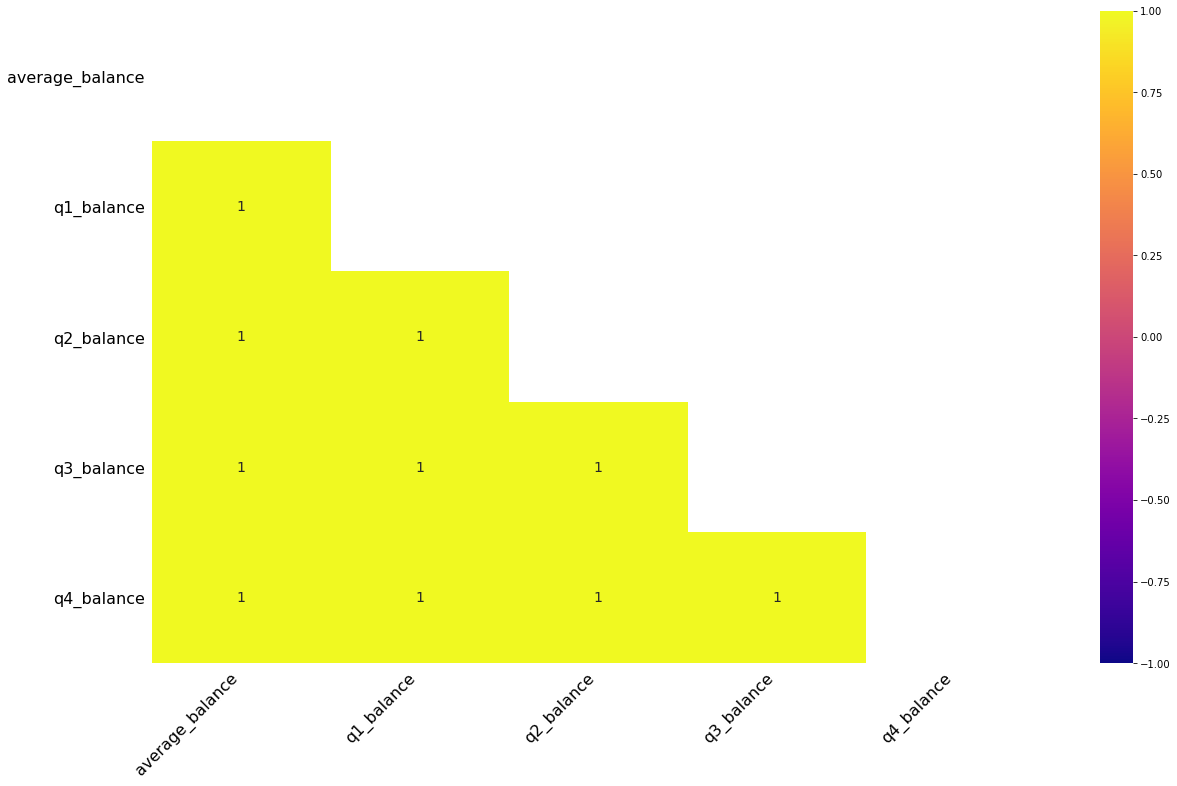

In [14]:
# If any of the following columns has a NaN value, they all have them: 'average_balance', 'q1_balance', 'q2_balance', 
# 'q3_balance', 'q4_balance'. This is what the below heatmap shows: there is a perfect correspondence (1) between 
# missing values in these columns.

msno.heatmap(raw, cmap='plasma')

In [15]:
raw_nan = raw[raw.isna().any(axis=1)]
raw_nan

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

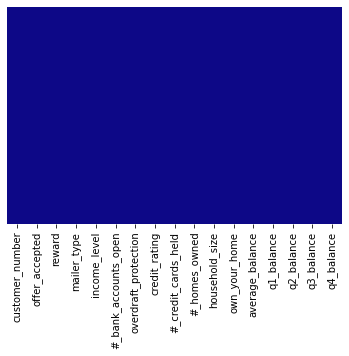

In [16]:
# I tried to do a heatmap of missing values, but it wasn't useful as 24 rows is too few compared to the
# 18,000 total number of rows, so the missing rows didn't show up
sns.heatmap(raw.isnull(), yticklabels=False, cbar=False, cmap='plasma')

As all NaN values were concentrated in 24 rows, which is relatively few compared to the size of the data, I decided to delete the 24 rows with NaN values.

In [17]:
raw.dropna(subset = ["average_balance"], inplace=True)

In [18]:
# Check how many missing values are in each column
raw.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [19]:
# The target label in our example is was the offer accepted? Yes (1) or No (0)
# I'm going to check the ratio of replies

raw['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='count'>

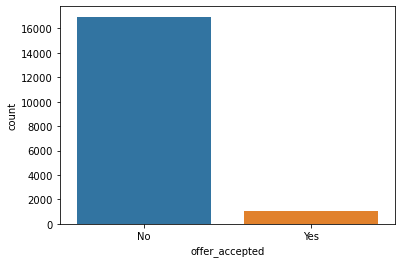

In [20]:
# I can visualize the ratio in a countplot
sns.countplot(x='offer_accepted', data=raw)

In [21]:
count_no = len(raw[raw['offer_accepted']=="No"])
count_yes = len(raw[raw['offer_accepted']=="Yes"])
percent_no = count_no/(count_no+count_yes)
print("Percentage of 'No' replies:", (round(percent_no*100)), '%')
percent_yes = count_yes/(count_no+count_yes)
print("Percentage of 'Yes' replies:", (round(percent_yes*100)),'%')

Percentage of 'No' replies: 94 %
Percentage of 'Yes' replies: 6 %


<b>Conclusion:</b> the data is imbalaced, only 6% of survey participants accepted a credit card

<AxesSubplot:xlabel='offer_accepted', ylabel='count'>

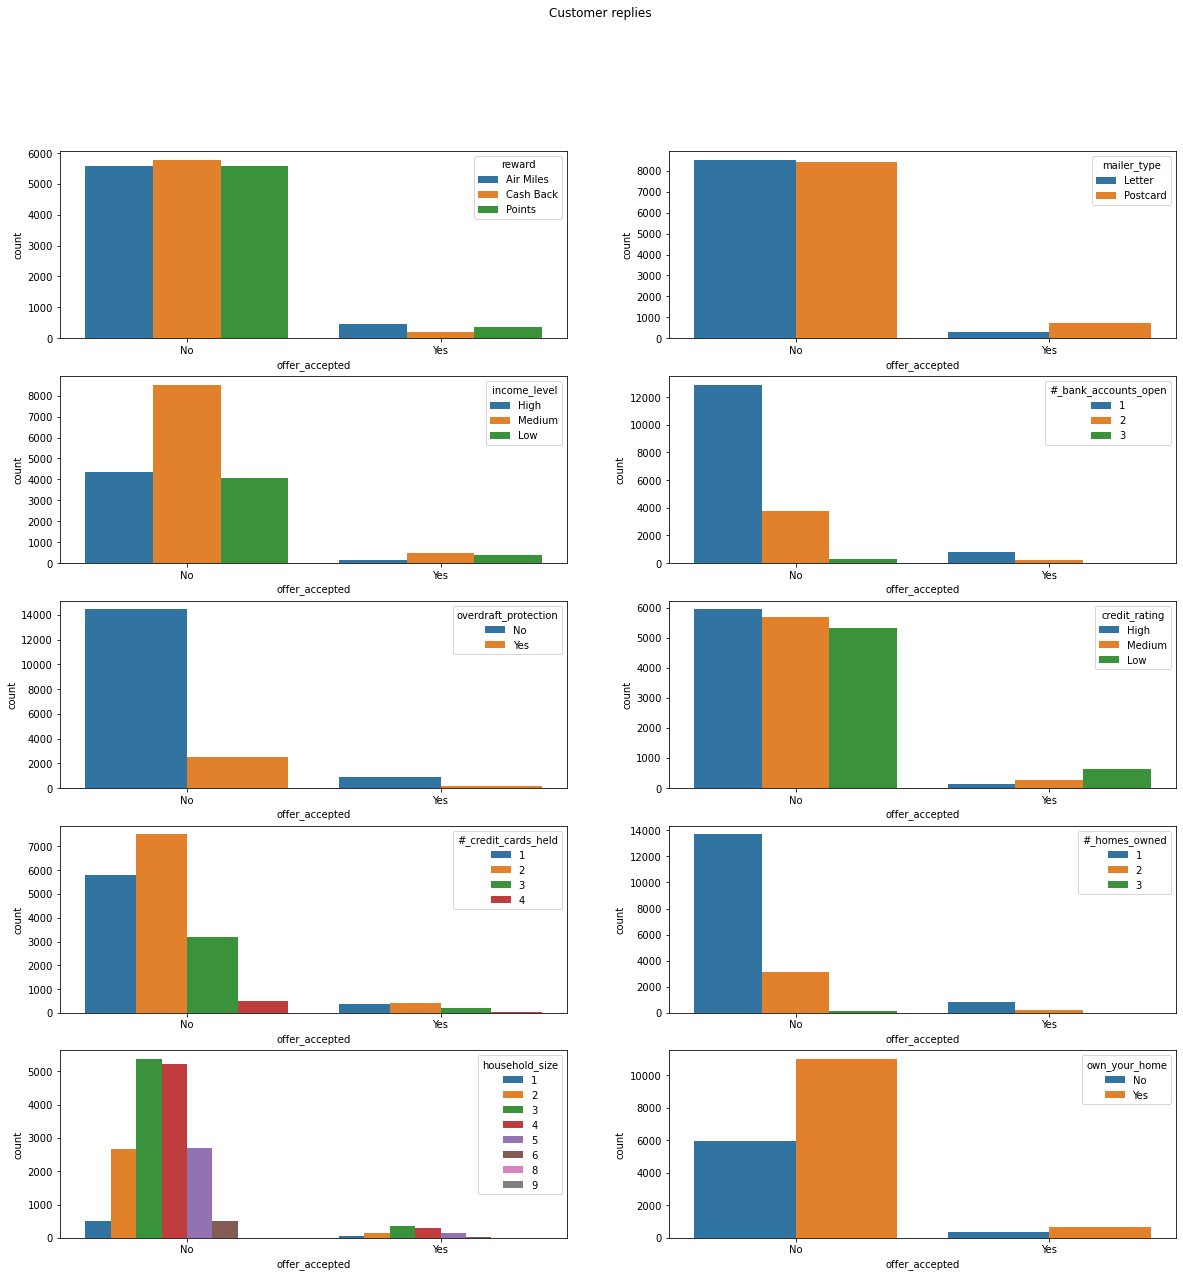

In [22]:
# Exploring if other charactersitics of customers affects their decision to get a card or not
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Customer replies')
sns.countplot(ax=axes[0, 0], data=raw, x='offer_accepted', hue='reward')
sns.countplot(ax=axes[0, 1], data=raw, x='offer_accepted', hue='mailer_type')
sns.countplot(ax=axes[1, 0], data=raw, x='offer_accepted', hue='income_level')
sns.countplot(ax=axes[1, 1], data=raw, x='offer_accepted', hue='#_bank_accounts_open')
sns.countplot(ax=axes[2, 0], data=raw, x='offer_accepted', hue='overdraft_protection')
sns.countplot(ax=axes[2, 1], data=raw, x='offer_accepted', hue='credit_rating')
sns.countplot(ax=axes[3, 0], data=raw, x='offer_accepted', hue='#_credit_cards_held')
sns.countplot(ax=axes[3, 1], data=raw, x='offer_accepted', hue='#_homes_owned')
sns.countplot(ax=axes[4, 0], data=raw, x='offer_accepted', hue='household_size')
sns.countplot(ax=axes[4, 1], data=raw, x='offer_accepted', hue='own_your_home')

<b>Conclusion:</b> based on looking at the above charts, there doesn't seem to be any correlation between people chosing to get a credit card and other charactestistics.

<AxesSubplot:>

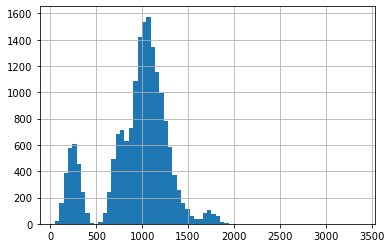

In [23]:
# Exploring the distribution of average balance and the Q1, Q2, Q3, and Q4 balances
raw['average_balance'].hist(bins=70)

<AxesSubplot:>

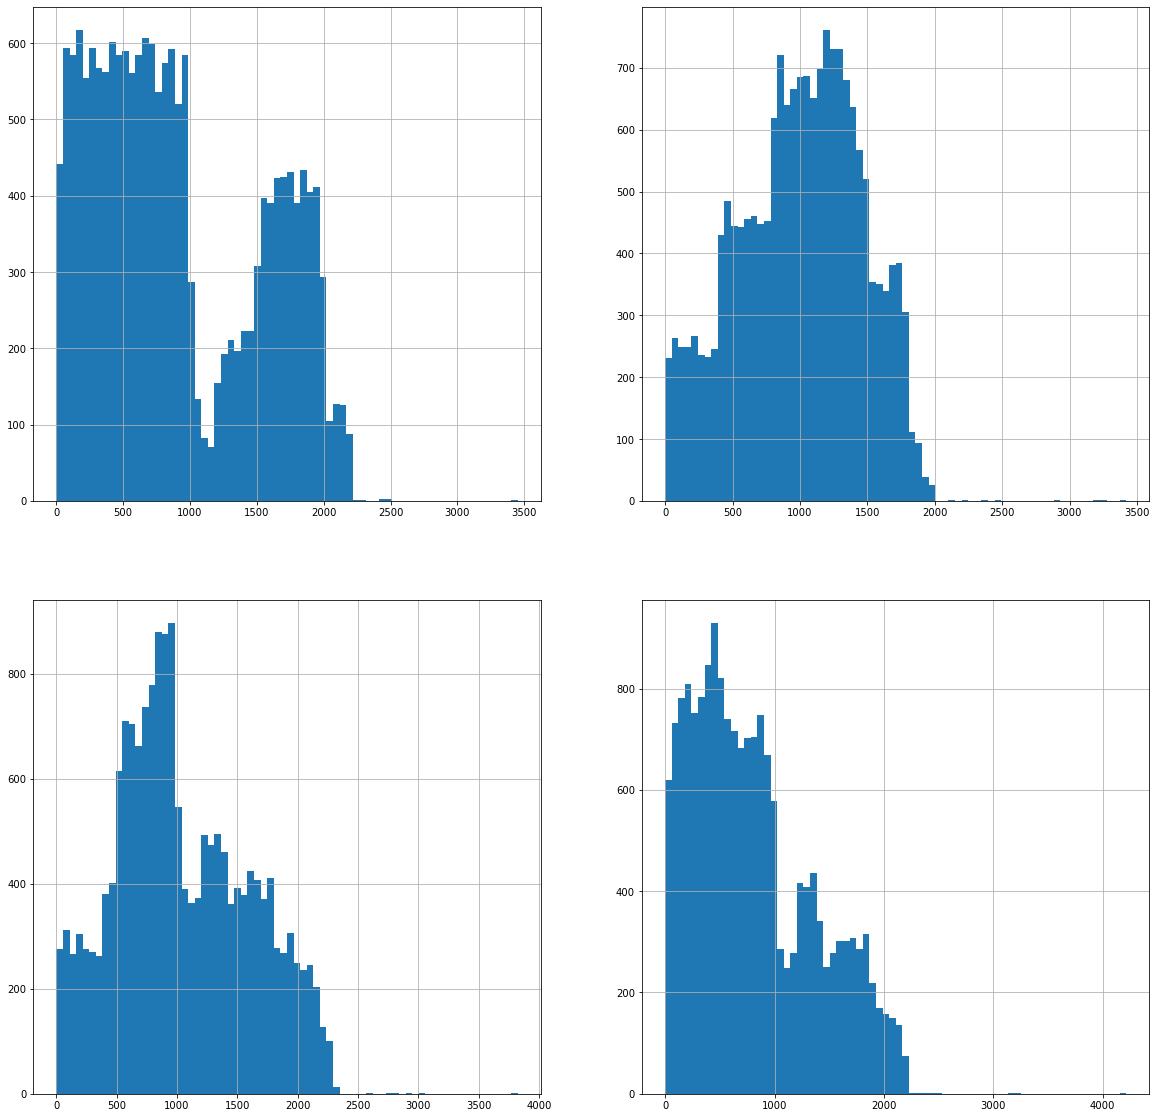

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
raw['q1_balance'].hist(ax=axes[0, 0], bins=70)
raw['q2_balance'].hist(ax=axes[0, 1], bins=70)
raw['q3_balance'].hist(ax=axes[1, 0], bins=70)
raw['q4_balance'].hist(ax=axes[1, 1], bins=70)

<b>Conclusion:</b> based on looking at the above charts, most customer's have a balance under approximately 25,000.

Transforming categorical columns into numerical / dummy columns

In [25]:
# There are 7 columns with categorical data: "offer_accepted" (2), "reward" (3), "mailer_type" (2), "income_level" (3), 
# "overdraft_protection" (2), "credit_rating" (3), and "own_your_home" (2). 
# multicollinearity can occur with the following columns: "offer_accepted" (2), "mailer_type" (2), "overdraft_protection" (2),
# and "own_your_home" (2), therefore only one new columns with be created for those.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(raw.dtypes)

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
#_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
#_credit_cards_held       int64
#_homes_owned             int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object


In [26]:
for col in list(raw):
    print(col)
    print(np.sort(raw[col].unique()))

customer_number
[    1     2     3 ... 17998 17999 18000]
offer_accepted
['No' 'Yes']
reward
['Air Miles' 'Cash Back' 'Points']
mailer_type
['Letter' 'Postcard']
income_level
['High' 'Low' 'Medium']
#_bank_accounts_open
[1 2 3]
overdraft_protection
['No' 'Yes']
credit_rating
['High' 'Low' 'Medium']
#_credit_cards_held
[1 2 3 4]
#_homes_owned
[1 2 3]
household_size
[1 2 3 4 5 6 8 9]
own_your_home
['No' 'Yes']
average_balance
[  48.25   56.     62.   ... 2738.5  2948.5  3366.25]
q1_balance
[0.000e+00 1.000e+00 2.000e+00 ... 2.502e+03 2.509e+03 3.450e+03]
q2_balance
[0.000e+00 1.000e+00 2.000e+00 ... 3.214e+03 3.240e+03 3.421e+03]
q3_balance
[0.000e+00 1.000e+00 2.000e+00 ... 2.945e+03 3.016e+03 3.823e+03]
q4_balance
[0.000e+00 1.000e+00 2.000e+00 ... 3.201e+03 3.218e+03 4.215e+03]


In [27]:
raw = pd.get_dummies(data=raw, columns=['offer_accepted', 'mailer_type', 'overdraft_protection', 'own_your_home'], drop_first=True)
raw

,customer_number,reward,income_level,#_bank_accounts_open,credit_rating,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted_Yes,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,1,Air Miles,High,1,High,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0
1,2,Air Miles,Medium,1,Medium,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,1
2,3,Air Miles,High,2,Medium,2,1,2,276.50,367.0,352.0,145.0,242.0,0,1,0,1
3,4,Air Miles,Medium,2,High,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0
4,5,Air Miles,Medium,1,Medium,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,Cash Back,High,1,Low,1,1,5,167.50,136.0,65.0,71.0,398.0,0,0,0,1
17996,17997,Cash Back,High,1,Low,3,1,3,850.50,984.0,940.0,943.0,535.0,0,0,0,1
17997,17998,Cash Back,High,1,Low,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,0,0,0,0
17998,17999,Cash Back,Medium,1,Medium,4,2,2,1022.25,626.0,983.0,865.0,1615.0,0,0,0,1


In [28]:
raw = pd.get_dummies(data=raw, columns=['reward', 'income_level', 'credit_rating'])
raw

,customer_number,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted_Yes,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,reward_Air Miles,reward_Cash Back,reward_Points,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,1,1,0,0,0,0,1,0,0,1
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,1,0,1,1,0,0,1,0,0,0,0,1
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0,0,0,0,1,0,1,0,1,0,0,0,1,0
17996,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0,0,0,0,1,0,1,0,1,0,0,0,1,0
17997,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,0,0,0,0,0,1,0,1,0,0,0,1,0
17998,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0,0,0,0,1,0,1,0,0,0,1,0,0,1


In [29]:
# I will drop 'customer_number' and that is basically just an index
raw.drop('customer_number', axis=1, inplace=True)

In [30]:
# All columns are numberical, and ready for our model. I will save the dataframe under the name cleaned
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(raw.dtypes)

#_bank_accounts_open          int64
#_credit_cards_held           int64
#_homes_owned                 int64
household_size                int64
average_balance             float64
q1_balance                  float64
q2_balance                  float64
q3_balance                  float64
q4_balance                  float64
offer_accepted_Yes            uint8
mailer_type_Postcard          uint8
overdraft_protection_Yes      uint8
own_your_home_Yes             uint8
reward_Air Miles              uint8
reward_Cash Back              uint8
reward_Points                 uint8
income_level_High             uint8
income_level_Low              uint8
income_level_Medium           uint8
credit_rating_High            uint8
credit_rating_Low             uint8
credit_rating_Medium          uint8
dtype: object


In [31]:
raw.to_csv('C:/Users/zsbor/data_mid_bootcamp_project_classification/data/02_cleaned/creditcardmarketing_cleaned.csv')

In [32]:
cleaned = pd.read_csv('C:/Users/zsbor/data_mid_bootcamp_project_classification/data/02_cleaned/creditcardmarketing_cleaned.csv')
cleaned

,Unnamed: 0,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted_Yes,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,reward_Air Miles,reward_Cash Back,reward_Points,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,1,1,0,0,0,0,1,0,0,1
2,2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,1,0,1,1,0,0,1,0,0,0,0,1
3,3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0,0,0,0,1,0,1,0,1,0,0,0,1,0
17972,17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0,0,0,0,1,0,1,0,1,0,0,0,1,0
17973,17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,0,0,0,0,0,1,0,1,0,0,0,1,0
17974,17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0,0,0,0,1,0,1,0,0,0,1,0,0,1


In [33]:
cleaned.drop('Unnamed: 0', axis=1, inplace=True)

[[Back to the top]](#TOP)

### <a id="Build-a-model"></a>2. Build a Model

In [34]:
cleaned.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted_Yes,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,reward_Air Miles,reward_Cash Back,reward_Points,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,1,1,0,0,0,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,1,0,1,1,0,0,1,0,0,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,1,1,0,0,0,0,1,0,0,1


In [35]:
X = cleaned.drop('offer_accepted_Yes',axis=1)
y = cleaned['offer_accepted_Yes']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### <a id="LR1"></a>Logistic Regression 1: Default / baseline

In [37]:
logreg1 = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=101, class_weight=None)

In [38]:
logreg1.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=101)

In [39]:
pred1 = logreg1.predict(X_test)

In [40]:
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [41]:
# Classification report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5087
           1       1.00      0.00      0.01       306

    accuracy                           0.94      5393
   macro avg       0.97      0.50      0.49      5393
weighted avg       0.95      0.94      0.92      5393



In [42]:
# Confusion matrix
confusion_matrix(y_test, pred1)

array([[5087,    0],
       [ 305,    1]], dtype=int64)

In [43]:
# Another way to display the results
print(f'Accuracy Score: {accuracy_score(y_test,pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred1)}')
print(f'Recall score: {recall_score(y_test,pred1)}')

Accuracy Score: 0.9434452067494901
Confusion Matrix: 
[[5087    0]
 [ 305    1]]
Area Under Curve: 0.5016339869281046
Recall score: 0.0032679738562091504


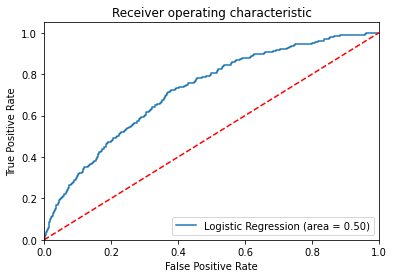

In [44]:
logit_roc_auc = roc_auc_score(y_test, logreg1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Conclusion: 
<br>
A Classification report is used to measure the quality of predictions from a classification algorithm.
<br>
True Postivies (Predicted positive and it’s true): 5087
<br>
False Positive (Type 1 Error) (Predicted positive and it’s false): 0
<br>
False Negative (Type 2 Error) (Predicted negative and it’s false): 305
<br>
True Negative (Predicted negative and it’s true): 1
<br>
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
<br>
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
<br>
The F1 score: a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
<br>
<b>As our data is very imbalanced, the model was able to predict 'No's very accuratly, but was not able to predict 'Yes's.</b>

#### <a id="LR2"></a>Logistics Regression 2: Weighted data
Since my data is inbalaced (there are 16955 'No' and 1021 'Yes' replies), I will weigh the data.

In [45]:
cleaned['offer_accepted_Yes'].value_counts()

0    16955
1     1021
Name: offer_accepted_Yes, dtype: int64

In [46]:
count_no = len(cleaned[cleaned['offer_accepted_Yes']==0])
count_yes = len(cleaned[cleaned['offer_accepted_Yes']==1])
percent_no = count_no/(count_no+count_yes)
print("Percentage of 'No'(0) replies:", (round(percent_no*100)), '%')
percent_yes = count_yes/(count_no+count_yes)
print("Percentage of 'Yes'(1) replies:", (round(percent_yes*100)),'%')

Percentage of 'No'(0) replies: 94 %
Percentage of 'Yes'(1) replies: 6 %


In [47]:
# define class weights
w = {0:6, 1:94}

In [48]:
logreg2 = LogisticRegression(class_weight=w, solver='lbfgs', max_iter=10000, random_state=101)

In [49]:
logreg2.fit(X_train,y_train)

LogisticRegression(class_weight={0: 6, 1: 94}, max_iter=10000, random_state=101)

In [50]:
pred2 = logreg2.predict(X_test)

In [51]:
# Classification report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5087
           1       0.11      0.63      0.19       306

    accuracy                           0.70      5393
   macro avg       0.54      0.67      0.50      5393
weighted avg       0.92      0.70      0.78      5393



In [52]:
# Confusion matrix
confusion_matrix(y_test, pred2)

array([[3559, 1528],
       [ 113,  193]], dtype=int64)

In [53]:
# Another way to display the results
print(f'Accuracy Score: {accuracy_score(y_test,pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred2)}')
print(f'Recall score: {recall_score(y_test,pred2)}')

Accuracy Score: 0.6957166697570926
Confusion Matrix: 
[[3559 1528]
 [ 113  193]]
Area Under Curve: 0.6651727265835894
Recall score: 0.630718954248366


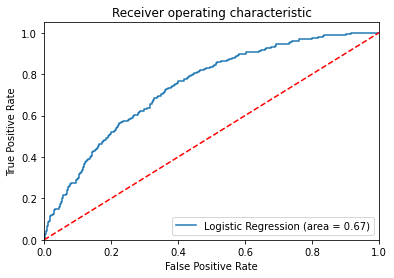

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Conclusion: 
<br>
True Postivies (Predicted positive and it’s true): 3458
<br>
False Positive (Type 1 Error) (Predicted positive and it’s false): 1629
<br>
False Negative (Type 2 Error) (Predicted negative and it’s false): 104
<br>
True Negative (Predicted negative and it’s true): 202

#### <a id="LR3"></a>Logistic Regression 3: Synthetic Minority Oversampling Technique (SMOTE)

The fundamental idead of oversampling is that one takes the minority class (in this case the 'Yes's) and tries to create a new sample that matched the amount of majority class samples.
There are different types of oversampling, such as 'Random oversampling' and 'Synthetic Minority Oversampling Technique (SMOTE)'

In [55]:
y.value_counts()

0    16955
1     1021
Name: offer_accepted_Yes, dtype: int64

In [56]:
# Oversampling the data
smote = SMOTE(random_state = 101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [57]:
y_train_smote.value_counts()

0    11868
1    11868
Name: offer_accepted_Yes, dtype: int64

In [58]:
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 11868, 1: 715})
After SMOTE:  Counter({0: 11868, 1: 11868})


In [59]:
logreg3 = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=101, class_weight=None)

In [60]:
logreg3.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=101)

In [61]:
pred3 = logreg3.predict(X_test)

In [62]:
# Classification report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5087
           1       0.19      0.04      0.07       306

    accuracy                           0.94      5393
   macro avg       0.57      0.51      0.52      5393
weighted avg       0.90      0.94      0.92      5393



In [63]:
# Confusion matrix
confusion_matrix(y_test, pred3)

array([[5037,   50],
       [ 294,   12]], dtype=int64)

In [64]:
# Another way to display the results
print(f'Accuracy Score: {accuracy_score(y_test,pred3)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred3)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred3)}')
print(f'Recall score: {recall_score(y_test,pred3)}')

Accuracy Score: 0.9362136102354904
Confusion Matrix: 
[[5037   50]
 [ 294   12]]
Area Under Curve: 0.5146933552268952
Recall score: 0.0392156862745098


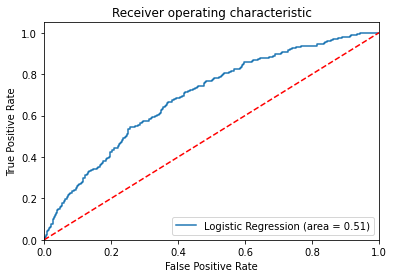

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


#### Conclusion: 
<br>
True Postivies (Predicted positive and it’s true): 5037
<br>
False Positive (Type 1 Error) (Predicted positive and it’s false): 50
<br>
False Negative (Type 2 Error) (Predicted negative and it’s false): 294
<br>
True Negative (Predicted negative and it’s true): 12

#### <a id="LR4"></a>Logistics Regression 4: Undersampling

In [66]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

In [67]:
cleaned['offer_accepted_Yes'].value_counts()

0    16955
1     1021
Name: offer_accepted_Yes, dtype: int64

My minority class is the 'Yes' replies (1). 

In [68]:
minority_class_count = len(cleaned[cleaned['offer_accepted_Yes'] == 1])
minority_class_count

1021

In [69]:
majority_class_indices = cleaned[cleaned['offer_accepted_Yes'] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17965, 17966, 17968, 17969, 17970, 17971, 17972, 17973, 17974,
            17975],
           dtype='int64', length=16955)


In [70]:
random_majority_class_indices = np.random.choice(majority_class_indices, 
                                                 minority_class_count, 
                                                 replace=False)
print(len(random_majority_class_indices))

1021


In [71]:
minority_class_indices = cleaned[cleaned['offer_accepted_Yes'] == 1].index
print(minority_class_indices)

Int64Index([   27,    45,    50,    57,    74,    76,    97,   101,   112,
              131,
            ...
            17866, 17872, 17879, 17890, 17907, 17916, 17918, 17947, 17960,
            17967],
           dtype='int64', length=1021)


In [72]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_class_indices])

In [73]:
under_sample = cleaned.loc[under_sample_indices]

In [74]:
under_sample

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted_Yes,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,reward_Air Miles,reward_Cash Back,reward_Points,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
27,1,1,1,2,769.50,54.0,515.0,1204.0,1305.0,1,0,0,0,1,0,0,0,0,1,0,1,0
45,1,2,1,5,851.25,206.0,467.0,1744.0,988.0,1,1,1,1,1,0,0,1,0,0,0,1,0
50,1,2,1,2,931.75,1536.0,1232.0,597.0,362.0,1,1,0,1,1,0,0,0,1,0,1,0,0
57,1,1,1,2,1192.75,1787.0,908.0,1343.0,733.0,1,1,0,1,1,0,0,0,1,0,0,0,1
74,1,2,2,5,1329.50,1073.0,1127.0,1603.0,1515.0,1,1,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14870,1,1,1,3,1205.75,1879.0,1720.0,903.0,321.0,0,0,0,0,0,1,0,0,1,0,1,0,0
15406,1,1,1,2,1209.50,55.0,1047.0,1752.0,1984.0,0,0,0,1,0,1,0,0,1,0,0,0,1
14894,1,2,1,3,1065.00,1948.0,1078.0,945.0,289.0,0,1,0,1,1,0,0,0,0,1,0,0,1
10148,1,1,1,3,1145.25,315.0,1083.0,1198.0,1985.0,0,0,0,1,1,0,0,0,0,1,0,0,1


<AxesSubplot:xlabel='offer_accepted_Yes', ylabel='count'>

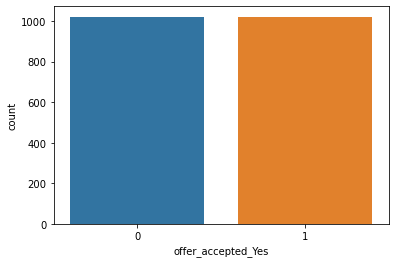

In [75]:
sns.countplot(x='offer_accepted_Yes', data=under_sample)

In [76]:
under_sample['offer_accepted_Yes'].value_counts()

0    1021
1    1021
Name: offer_accepted_Yes, dtype: int64

In [77]:
X = under_sample.drop('offer_accepted_Yes',axis=1)
y = under_sample['offer_accepted_Yes']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

In [79]:
logreg_under_sample = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=101, class_weight=None)

In [80]:
logreg_under_sample.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=101)

In [81]:
pred_under_sample = logreg_under_sample.predict(X_test)

In [82]:
# Classification report
print(classification_report(y_test, pred_under_sample))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       514
           1       0.66      0.73      0.69       507

    accuracy                           0.68      1021
   macro avg       0.68      0.68      0.68      1021
weighted avg       0.68      0.68      0.68      1021



In [83]:
# Confusion matrix
confusion_matrix(y_test, pred_under_sample)

array([[325, 189],
       [138, 369]], dtype=int64)

<AxesSubplot:>

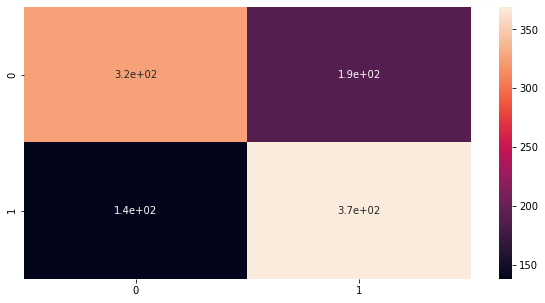

In [89]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(y_test, pred_under_sample), annot=True)

In [90]:
# Another way to display the results
print(f'Accuracy Score: {accuracy_score(y_test, pred_under_sample)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred_under_sample)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred_under_sample)}')
print(f'Recall score: {recall_score(y_test, pred_under_sample)}')

Accuracy Score: 0.6797257590597453
Confusion Matrix: 
[[325 189]
 [138 369]]
Area Under Curve: 0.6800531853659659
Recall score: 0.727810650887574


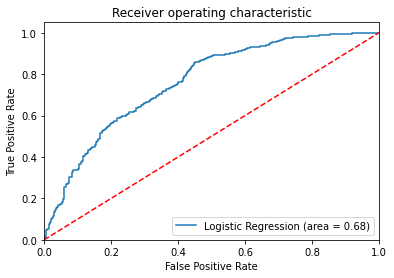

In [91]:
logit_roc_auc = roc_auc_score(y_test, logreg_under_sample.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_under_sample.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### <a id="LRconc"></a>Logistic Regression: Conclusion
Due to the drastic imbalance in the data, oversampling did not bring good results. Undersampling however managed to produce reletively high and balanced F1 scores.

[[Back to the top]](#TOP)

### K Nearest Neighbors

In [ ]:
cleaned.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(cleaned.drop('offer_accepted_Yes', axis=1))

In [ ]:
scaled_features = scaler.transform(cleaned.drop('offer_accepted_Yes', axis=1))

In [ ]:
scaled_features

In [ ]:
cleaned_feat = pd.DataFrame(scaled_features,columns=cleaned.columns[:-1])

In [ ]:
cleaned_feat

In [ ]:
X = cleaned_feat
y = cleaned['offer_accepted_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
pred_knn = knn.predict(X_test)
pred_knn

In [ ]:
print(confusion_matrix(y_test, pred_knn))

In [ ]:
# Classification report
print(classification_report(y_test, pred_knn))

In [ ]:
# Elbow mentod to chose correct K value
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
pred_knn2 = knn.predict(X_test)
pred_knn2

In [ ]:
# Classification report
print(classification_report(y_test, pred_knn2))

In [ ]:
# Classification report
print(classification_report(y_test, pred_knn))

[[Back to the top]](#TOP)